## Deep Transfer Learning with LeNet on DNA Sequence Dataset

By: Sk. Tanzir Mehedi

Importing libraries

In [ ]:
import time
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import TensorBoard
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Importing the Dataset

In [ ]:
dataset=pd.read_csv('preprocessedDNASequenceDatase.csv')

Exploratory Data Analysis

In [ ]:
dataset.head()

,page_like,page_followers,page_category,familiar,symbol,age,sex,post_category,post_views,post_share,post_comments,post_comment_type,post_like,post_love,post_smile,post_care,post_wow,post_angry,post_sad,label
0,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.004926,0.000009,4.900000e-07,0.000008,0.333333,0.000025,6.120000e-07,0.000082,0.000013,0.000034,0.000197,0.000050,1
1,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.009852,0.000000,5.310000e-06,0.000027,0.333333,0.000037,4.080000e-07,0.000072,0.000025,0.000024,0.000705,0.000100,1
2,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.009852,0.000000,7.780000e-06,0.000077,0.333333,0.000041,8.160000e-07,0.000002,0.000132,0.000136,0.000082,0.000064,1
3,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.009852,0.000000,3.960000e-06,0.000043,0.333333,0.000040,2.650000e-06,0.000003,0.000025,0.000034,0.000918,0.000241,1
4,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.009852,0.000000,1.820000e-06,0.000043,0.333333,0.000022,1.220000e-06,0.000005,0.000069,0.000034,0.001098,0.000018,1


In [ ]:
properties = list(dataset.columns.values)
properties.remove('label')
X = dataset[properties]
y = dataset['label']

Split Dataset into Training Set and Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Check the nb classes

In [ ]:
nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))
nb_classes

2

Transform the labels from integers to one hot vectors

In [ ]:
enc = sklearn.preprocessing.OneHotEncoder(categories='auto')
enc.fit(np.concatenate((y_train, y_test), axis=0).reshape(-1, 1))

y_train = enc.transform(y_train.values.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.values.reshape(-1, 1)).toarray()

Save orignal y because later we will use binary

In [ ]:
y_true = np.argmax(y_test, axis=1)

If univariate then add a dimension to make it multivariate with one dimension

In [ ]:
 if len(X_train.shape) == 2: 
        X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
        input_shape = X_train.shape[1:]

Making the Model

In [ ]:
input_layer = keras.layers.Input(input_shape)
        
conv_1 = keras.layers.Conv1D(filters=5,kernel_size=5,activation='relu', padding='same')(input_layer)
conv_1 = keras.layers.MaxPool1D(pool_size=2)(conv_1)
        
conv_2 = keras.layers.Conv1D(filters=20, kernel_size=5, activation='relu', padding='same')(conv_1)
conv_2 = keras.layers.MaxPool1D(pool_size=4)(conv_2)
        
# here did not mention the number of hidden units in the fully-connected layer
# so I took the lenet
        
flatten_layer = keras.layers.Flatten()(conv_2)
fully_connected_layer = keras.layers.Dense(500,activation='relu')(flatten_layer)
        
output_layer = keras.layers.Dense(nb_classes,activation='softmax')(fully_connected_layer)
        
model = keras.models.Model(inputs=input_layer,outputs=output_layer)

Compile the Model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.01,decay=0.005), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 19, 5)             30        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9, 5)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 9, 20)             520       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 20)             0         
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 500)              

Result View with TensorBoard

In [ ]:
NAME = "LeNet on DNA Sequence Dataset"
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME), histogram_freq = 1, profile_batch = 5)

Fitting the model

In [ ]:
# x_val and y_val are only used to monitor the test loss and NOT for training
batch_size = 64
nb_epochs = 1000

mini_batch_size = int(min(X_train.shape[0] / 10, batch_size))

start_time = time.time()

history=model.fit(X_train, y_train, batch_size=mini_batch_size, epochs=nb_epochs, validation_data=(X_test, y_test),callbacks=[tensorboard])

duration = time.time() - start_time

Epoch 1/1000
 1/55 [..............................] - ETA: 0s - loss: 0.7189 - accuracy: 0.0625WARNING:tensorflow:From C:\Users\tusar lahiri\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
55/55 [==============================] - 2s 39ms/step - loss: 0.1450 - accuracy: 0.9483 - val_loss: 0.0713 - val_accuracy: 0.9714
Epoch 2/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0694 - accuracy: 0.9777 - val_loss: 0.0519 - val_accuracy: 0.9847
Epoch 3/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0615 - accuracy: 0.9834 - val_loss: 0.0496 - val_accuracy: 0.9867
Epoch 4/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0590 - accuracy: 0.9843 - val_loss: 0.0500 - val_accuracy: 0.9833
Epoch 5/1000
55/55 [===========================

55/55 [==============================] - 0s 7ms/step - loss: 0.0369 - accuracy: 0.9891 - val_loss: 0.0331 - val_accuracy: 0.9913
Epoch 56/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.0331 - val_accuracy: 0.9920
Epoch 57/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.0329 - val_accuracy: 0.9920
Epoch 58/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.0333 - val_accuracy: 0.9920
Epoch 59/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.0332 - val_accuracy: 0.9920
Epoch 60/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0343 - accuracy: 0.9886 - val_loss: 0.0366 - val_accuracy: 0.9913
Epoch 61/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0358 - accuracy: 0.9883 - val_loss: 0.0326 - val_accuracy: 0.9920
Epoch 62/1000

55/55 [==============================] - 0s 8ms/step - loss: 0.0318 - accuracy: 0.9897 - val_loss: 0.0339 - val_accuracy: 0.9920
Epoch 113/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.0313 - accuracy: 0.9891 - val_loss: 0.0345 - val_accuracy: 0.9920
Epoch 114/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0306 - accuracy: 0.9889 - val_loss: 0.0334 - val_accuracy: 0.9920
Epoch 115/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0305 - accuracy: 0.9897 - val_loss: 0.0335 - val_accuracy: 0.9920
Epoch 116/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0306 - accuracy: 0.9894 - val_loss: 0.0341 - val_accuracy: 0.9920
Epoch 117/1000
55/55 [==============================] - 1s 9ms/step - loss: 0.0308 - accuracy: 0.9886 - val_loss: 0.0354 - val_accuracy: 0.9920
Epoch 118/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0301 - accuracy: 0.9894 - val_loss: 0.0350 - val_accuracy: 0.9920
Epoch 

Epoch 169/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0288 - accuracy: 0.9891 - val_loss: 0.0353 - val_accuracy: 0.9920
Epoch 170/1000
55/55 [==============================] - 1s 11ms/step - loss: 0.0281 - accuracy: 0.9897 - val_loss: 0.0358 - val_accuracy: 0.9920
Epoch 171/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.0281 - accuracy: 0.9891 - val_loss: 0.0353 - val_accuracy: 0.9920
Epoch 172/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0282 - accuracy: 0.9897 - val_loss: 0.0355 - val_accuracy: 0.9920
Epoch 173/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0277 - accuracy: 0.9900 - val_loss: 0.0356 - val_accuracy: 0.9920
Epoch 174/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0281 - accuracy: 0.9894 - val_loss: 0.0360 - val_accuracy: 0.9920
Epoch 175/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.0280 - accuracy: 0.9900 - val_loss: 0.0356 - val_accura

Epoch 226/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0267 - accuracy: 0.9900 - val_loss: 0.0368 - val_accuracy: 0.9920
Epoch 227/1000
55/55 [==============================] - 1s 11ms/step - loss: 0.0268 - accuracy: 0.9894 - val_loss: 0.0371 - val_accuracy: 0.9920
Epoch 228/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0264 - accuracy: 0.9897 - val_loss: 0.0371 - val_accuracy: 0.9907
Epoch 229/1000
55/55 [==============================] - 1s 11ms/step - loss: 0.0264 - accuracy: 0.9900 - val_loss: 0.0369 - val_accuracy: 0.9907
Epoch 230/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0263 - accuracy: 0.9894 - val_loss: 0.0374 - val_accuracy: 0.9907
Epoch 231/1000
55/55 [==============================] - 1s 9ms/step - loss: 0.0270 - accuracy: 0.9903 - val_loss: 0.0369 - val_accuracy: 0.9907
Epoch 232/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0266 - accuracy: 0.9903 - val_loss: 0.0372 - val_accurac

Epoch 283/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.0254 - accuracy: 0.9897 - val_loss: 0.0382 - val_accuracy: 0.9907
Epoch 284/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0253 - accuracy: 0.9900 - val_loss: 0.0386 - val_accuracy: 0.9907
Epoch 285/1000
55/55 [==============================] - 1s 9ms/step - loss: 0.0257 - accuracy: 0.9903 - val_loss: 0.0385 - val_accuracy: 0.9907
Epoch 286/1000
55/55 [==============================] - 1s 9ms/step - loss: 0.0255 - accuracy: 0.9900 - val_loss: 0.0388 - val_accuracy: 0.9907
Epoch 287/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0253 - accuracy: 0.9909 - val_loss: 0.0384 - val_accuracy: 0.9907
Epoch 288/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0257 - accuracy: 0.9906 - val_loss: 0.0391 - val_accuracy: 0.9920
Epoch 289/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0260 - accuracy: 0.9903 - val_loss: 0.0385 - val_accuracy

Epoch 340/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0249 - accuracy: 0.9903 - val_loss: 0.0394 - val_accuracy: 0.9907
Epoch 341/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0249 - accuracy: 0.9897 - val_loss: 0.0395 - val_accuracy: 0.9907
Epoch 342/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0253 - accuracy: 0.9909 - val_loss: 0.0395 - val_accuracy: 0.9907
Epoch 343/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0247 - accuracy: 0.9900 - val_loss: 0.0394 - val_accuracy: 0.9907
Epoch 344/1000
55/55 [==============================] - 1s 20ms/step - loss: 0.0249 - accuracy: 0.9897 - val_loss: 0.0394 - val_accuracy: 0.9907
Epoch 345/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0248 - accuracy: 0.9909 - val_loss: 0.0393 - val_accuracy: 0.9907
Epoch 346/1000
55/55 [==============================] - 1s 9ms/step - loss: 0.0247 - accuracy: 0.9900 - val_loss: 0.0394 - val_accuracy

Epoch 397/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.9909 - val_loss: 0.0403 - val_accuracy: 0.9907
Epoch 398/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0245 - accuracy: 0.9903 - val_loss: 0.0402 - val_accuracy: 0.9907
Epoch 399/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0241 - accuracy: 0.9900 - val_loss: 0.0404 - val_accuracy: 0.9907
Epoch 400/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.9903 - val_loss: 0.0404 - val_accuracy: 0.9907
Epoch 401/1000
55/55 [==============================] - 1s 9ms/step - loss: 0.0244 - accuracy: 0.9900 - val_loss: 0.0404 - val_accuracy: 0.9907
Epoch 402/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0243 - accuracy: 0.9906 - val_loss: 0.0404 - val_accuracy: 0.9907
Epoch 403/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.0243 - accuracy: 0.9903 - val_loss: 0.0405 - val_accuracy

Epoch 454/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0238 - accuracy: 0.9906 - val_loss: 0.0411 - val_accuracy: 0.9907
Epoch 455/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0241 - accuracy: 0.9903 - val_loss: 0.0412 - val_accuracy: 0.9907
Epoch 456/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0237 - accuracy: 0.9906 - val_loss: 0.0414 - val_accuracy: 0.9907
Epoch 457/1000
55/55 [==============================] - 1s 9ms/step - loss: 0.0238 - accuracy: 0.9903 - val_loss: 0.0412 - val_accuracy: 0.9907
Epoch 458/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0236 - accuracy: 0.9903 - val_loss: 0.0411 - val_accuracy: 0.9907
Epoch 459/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0240 - accuracy: 0.9906 - val_loss: 0.0411 - val_accuracy: 0.9907
Epoch 460/1000
55/55 [==============================] - 1s 10ms/step - loss: 0.0240 - accuracy: 0.9903 - val_loss: 0.0415 - val_accuracy

Epoch 511/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0236 - accuracy: 0.9906 - val_loss: 0.0418 - val_accuracy: 0.9907
Epoch 512/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0237 - accuracy: 0.9906 - val_loss: 0.0417 - val_accuracy: 0.9907
Epoch 513/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 0.9903 - val_loss: 0.0419 - val_accuracy: 0.9907
Epoch 514/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0234 - accuracy: 0.9903 - val_loss: 0.0418 - val_accuracy: 0.9907
Epoch 515/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0235 - accuracy: 0.9906 - val_loss: 0.0417 - val_accuracy: 0.9907
Epoch 516/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.9911 - val_loss: 0.0420 - val_accuracy: 0.9907
Epoch 517/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0234 - accuracy: 0.9903 - val_loss: 0.0419 - val_accuracy:

Epoch 568/1000
55/55 [==============================] - 1s 9ms/step - loss: 0.0232 - accuracy: 0.9909 - val_loss: 0.0427 - val_accuracy: 0.9907
Epoch 569/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0230 - accuracy: 0.9909 - val_loss: 0.0424 - val_accuracy: 0.9907
Epoch 570/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0230 - accuracy: 0.9909 - val_loss: 0.0423 - val_accuracy: 0.9907
Epoch 571/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0230 - accuracy: 0.9909 - val_loss: 0.0426 - val_accuracy: 0.9907
Epoch 572/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0231 - accuracy: 0.9906 - val_loss: 0.0426 - val_accuracy: 0.9907
Epoch 573/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 0.9909 - val_loss: 0.0424 - val_accuracy: 0.9907
Epoch 574/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0231 - accuracy: 0.9906 - val_loss: 0.0426 - val_accuracy:

Epoch 625/1000
55/55 [==============================] - 1s 11ms/step - loss: 0.0229 - accuracy: 0.9909 - val_loss: 0.0432 - val_accuracy: 0.9907
Epoch 626/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0228 - accuracy: 0.9911 - val_loss: 0.0430 - val_accuracy: 0.9907
Epoch 627/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.9906 - val_loss: 0.0434 - val_accuracy: 0.9907
Epoch 628/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0227 - accuracy: 0.9906 - val_loss: 0.0432 - val_accuracy: 0.9907
Epoch 629/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9909 - val_loss: 0.0431 - val_accuracy: 0.9907
Epoch 630/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0227 - accuracy: 0.9903 - val_loss: 0.0437 - val_accuracy: 0.9907
Epoch 631/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0228 - accuracy: 0.9906 - val_loss: 0.0431 - val_accuracy

55/55 [==============================] - 0s 8ms/step - loss: 0.0225 - accuracy: 0.9906 - val_loss: 0.0436 - val_accuracy: 0.9907
Epoch 682/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9903 - val_loss: 0.0435 - val_accuracy: 0.9907
Epoch 683/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0225 - accuracy: 0.9906 - val_loss: 0.0433 - val_accuracy: 0.9907
Epoch 684/1000
55/55 [==============================] - 1s 11ms/step - loss: 0.0227 - accuracy: 0.9906 - val_loss: 0.0435 - val_accuracy: 0.9907
Epoch 685/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0224 - accuracy: 0.9909 - val_loss: 0.0434 - val_accuracy: 0.9907
Epoch 686/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0225 - accuracy: 0.9911 - val_loss: 0.0436 - val_accuracy: 0.9907
Epoch 687/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0226 - accuracy: 0.9909 - val_loss: 0.0434 - val_accuracy: 0.9907
Epoch 

Epoch 738/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0223 - accuracy: 0.9909 - val_loss: 0.0440 - val_accuracy: 0.9907
Epoch 739/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0225 - accuracy: 0.9909 - val_loss: 0.0439 - val_accuracy: 0.9907
Epoch 740/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0224 - accuracy: 0.9906 - val_loss: 0.0439 - val_accuracy: 0.9907
Epoch 741/1000
55/55 [==============================] - 1s 20ms/step - loss: 0.0222 - accuracy: 0.9909 - val_loss: 0.0441 - val_accuracy: 0.9907
Epoch 742/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0221 - accuracy: 0.9911 - val_loss: 0.0441 - val_accuracy: 0.9907
Epoch 743/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0222 - accuracy: 0.9909 - val_loss: 0.0440 - val_accuracy: 0.9907
Epoch 744/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0223 - accuracy: 0.9909 - val_loss: 0.0439 - val_accuracy

Epoch 795/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9903 - val_loss: 0.0443 - val_accuracy: 0.9907
Epoch 796/1000
55/55 [==============================] - 1s 9ms/step - loss: 0.0222 - accuracy: 0.9911 - val_loss: 0.0443 - val_accuracy: 0.9907
Epoch 797/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 0.9909 - val_loss: 0.0444 - val_accuracy: 0.9907
Epoch 798/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9911 - val_loss: 0.0443 - val_accuracy: 0.9907
Epoch 799/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9911 - val_loss: 0.0444 - val_accuracy: 0.9907
Epoch 800/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0222 - accuracy: 0.9909 - val_loss: 0.0446 - val_accuracy: 0.9907
Epoch 801/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0220 - accuracy: 0.9909 - val_loss: 0.0444 - val_accuracy:

Epoch 852/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 0.9909 - val_loss: 0.0449 - val_accuracy: 0.9907
Epoch 853/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0219 - accuracy: 0.9906 - val_loss: 0.0447 - val_accuracy: 0.9907
Epoch 854/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0218 - accuracy: 0.9911 - val_loss: 0.0449 - val_accuracy: 0.9907
Epoch 855/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0219 - accuracy: 0.9911 - val_loss: 0.0448 - val_accuracy: 0.9907
Epoch 856/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9909 - val_loss: 0.0450 - val_accuracy: 0.9907
Epoch 857/1000
55/55 [==============================] - 0s 9ms/step - loss: 0.0218 - accuracy: 0.9911 - val_loss: 0.0448 - val_accuracy: 0.9907
Epoch 858/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0219 - accuracy: 0.9911 - val_loss: 0.0447 - val_accuracy:

Epoch 909/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0219 - accuracy: 0.9911 - val_loss: 0.0451 - val_accuracy: 0.9907
Epoch 910/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0217 - accuracy: 0.9911 - val_loss: 0.0451 - val_accuracy: 0.9907
Epoch 911/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.9911 - val_loss: 0.0452 - val_accuracy: 0.9907
Epoch 912/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0218 - accuracy: 0.9909 - val_loss: 0.0449 - val_accuracy: 0.9907
Epoch 913/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.9911 - val_loss: 0.0451 - val_accuracy: 0.9907
Epoch 914/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.9911 - val_loss: 0.0452 - val_accuracy: 0.9907
Epoch 915/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0217 - accuracy: 0.9909 - val_loss: 0.0452 - val_accuracy:

Epoch 966/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0216 - accuracy: 0.9911 - val_loss: 0.0454 - val_accuracy: 0.9907
Epoch 967/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0216 - accuracy: 0.9911 - val_loss: 0.0455 - val_accuracy: 0.9907
Epoch 968/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.9911 - val_loss: 0.0454 - val_accuracy: 0.9907
Epoch 969/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0218 - accuracy: 0.9909 - val_loss: 0.0458 - val_accuracy: 0.9907
Epoch 970/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0216 - accuracy: 0.9911 - val_loss: 0.0454 - val_accuracy: 0.9907
Epoch 971/1000
55/55 [==============================] - 0s 7ms/step - loss: 0.0216 - accuracy: 0.9909 - val_loss: 0.0457 - val_accuracy: 0.9907
Epoch 972/1000
55/55 [==============================] - 0s 8ms/step - loss: 0.0216 - accuracy: 0.9911 - val_loss: 0.0456 - val_accuracy:

Making Predictions

In [ ]:
start_time = time.time()
y_pred = model.predict(X_test)
duration1 = time.time() - start_time

Convert the predicted from binary to integer

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

Evaluating the Algorithm

In [ ]:
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[  31   12]
 [   2 1456]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82        43
           1       0.99      1.00      1.00      1458

    accuracy                           0.99      1501
   macro avg       0.97      0.86      0.91      1501
weighted avg       0.99      0.99      0.99      1501



In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_true, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_true, y_pred, average='weighted',labels=np.unique(y_pred)))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_true, y_pred,average='weighted', labels=np.unique(y_pred)))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred)))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_true, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_true, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_true, y_pred))

#Train time
print('Train Time(s): ',duration) 

#Test time
print('Test Time(s): ',duration1)

Accuracy: 0.9906728847435043
Precision: 0.9903235731266817
Recall: 0.9906728847435043
F1 Score: 0.9900751970775463
Mean Absolute Error: 0.009327115256495669
Cohens kappa: 0.8110897355220339
ROC AUC: 0.8597792452228283
Train Time(s):  503.2535743713379
Test Time(s):  0.4323759078979492


In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


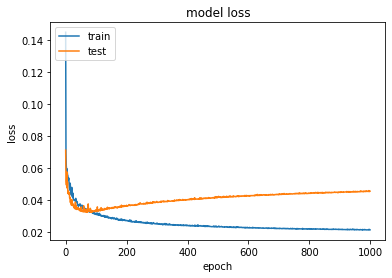

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

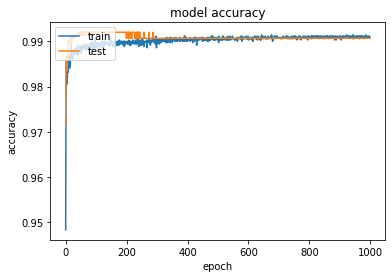

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
keras.backend.clear_session()